In [102]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [25]:
df_train = pd.read_csv("training_data.csv")
df_test = pd.read_csv("test_data.csv")

In [121]:
def get_cleanedUnit(raw_unit):
    updated = raw_unit.lower()
    updated = updated.replace('μ', 'u').replace("micro", "u")
    
    updated = re.sub('[^0-9a-zA-Z/μ]+', '', updated)
    
    updated = updated.replace('iu', 'u').replace("ui", "ul")
    return updated
        

def primaryFormatting(df):
    date_field = "created_at"
    str_field = ["unit", "standard_lab_parameter_name", "age_group"]
    num_field = ["reference_high", "reference_low", "parameter_value"]
    target_field = ["gender"]

    # Date-time formatting
    df[date_field] = pd.to_datetime(df[date_field], utc=True)
    df[date_field] = df[date_field].astype('datetime64[ns]')
    
    # unit cleaning
    df[str_field[0]] = df[str_field[0]].apply(get_cleanedUnit)
    
    # str cleaning
    for eachStrCol in str_field:
        df[eachStrCol] = df[eachStrCol].str.lower()

    
    # feature combination
    df["parameter_unit"] = df[str_field[1]] + "_" + df[str_field[0]]
    str_field.append("parameter_unit")
    
    required_fields = [date_field] + num_field + str_field + target_field
    
    return df[required_fields]


def get_filtered_data(df):
    parameter_unit_rm = ['chloride_pg/ml',
                         'sgpt_u',
                         't4_g/l',
                         't4_nmol/l',
                         'wbc_/cmm',
                         'wbc_cells',
                         'wbc_cells/hpf']
    df = df[~df["parameter_unit"].isin(parameter_unit_rm)]
    
#     df = df[]
    return df

In [122]:
df_work = primaryFormatting(df_train.copy())
df_filtered = get_filtered_data(df_work.copy())

In [98]:
# print(df_work["standard_lab_parameter_name"].value_counts())
# print(df_work["unit"].value_counts())

# for eachParam, eachDf in df_work.groupby("standard_lab_parameter_name"):
#     print(eachParam)
#     print(eachDf["unit"].value_counts())
#     print("-------------------------")

**Extreme Values**

In [89]:
df_work.head()

,created_at,reference_high,reference_low,parameter_value,unit,standard_lab_parameter_name,age_group,parameter_unit,gender
0,2019-07-02 01:19:03.581000,10.0,4.0,579.00,103/ul,WBC,old,WBC_103/ul,male
1,2019-07-02 01:19:03.581000,12.0,4.5,5.00,ug/dl,T4,old,T4_ug/dl,male
2,2019-05-06 14:07:51.925000,10.0,4.0,6.81,103/ul,WBC,adult,WBC_103/ul,male
3,2019-05-06 14:07:51.925000,12.0,4.5,5.70,ug/dl,T4,adult,T4_ug/dl,male
4,2019-07-21 13:41:00.528523,10.0,4.0,4.64,103/ul,WBC,adult,WBC_103/ul,male


In [90]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   created_at                   10000 non-null  datetime64[ns]
 1   reference_high               10000 non-null  float64       
 2   reference_low                10000 non-null  float64       
 3   parameter_value              10000 non-null  float64       
 4   unit                         10000 non-null  object        
 5   standard_lab_parameter_name  10000 non-null  object        
 6   age_group                    10000 non-null  object        
 7   parameter_unit               10000 non-null  object        
 8   gender                       10000 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 703.2+ KB


In [91]:
df_work.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
reference_high,10000.0,372.848728,1800.575300,1.12,10.0,12.00,107.0,15000.0
reference_low,10000.0,162.951938,712.506331,0.00,4.0,4.50,98.0,5000.0
parameter_value,10000.0,356.897325,9289.389443,-71.00,6.7,8.83,101.0,920000.0


In [180]:
import pandas_profiling 
profile= pandas_profiling.ProfileReport(df_work)
# profile.to_file("data_summary.html")
profile

**Pattern Observed**

**Outlier Detection**

chloride_meq/l
Data : (34, 9)


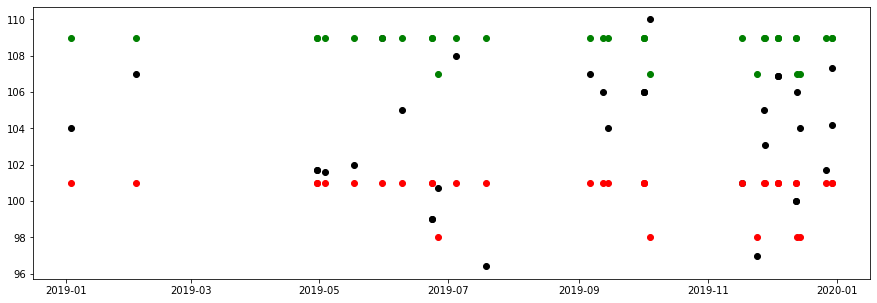

----------------
chloride_mmol/l
Data : (1148, 9)


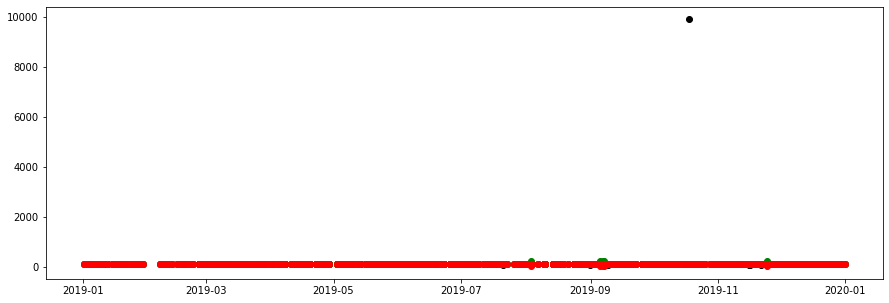

----------------
chloride_uu/ml
Data : (12, 9)


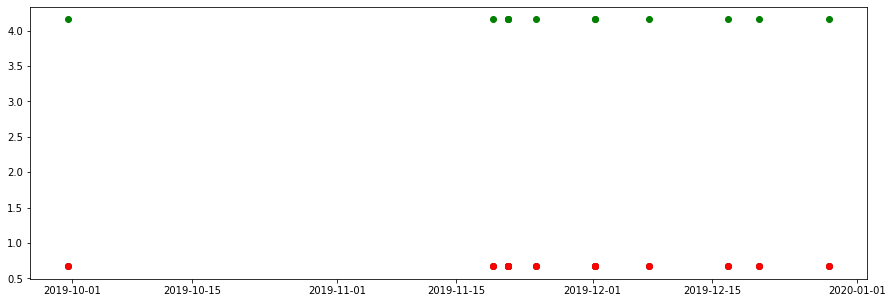

----------------
sgpt_u/l
Data : (1171, 9)


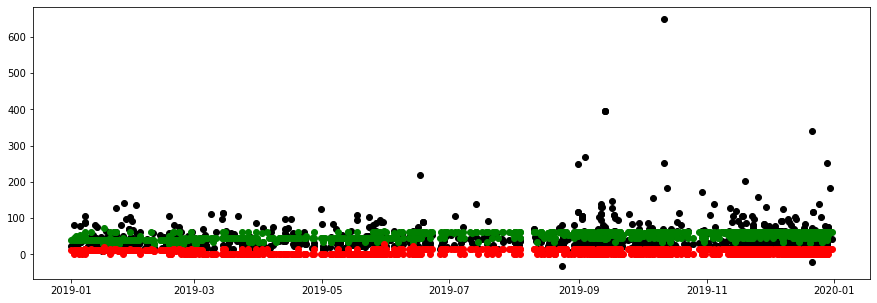

----------------
sodium_meq/l
Data : (39, 9)


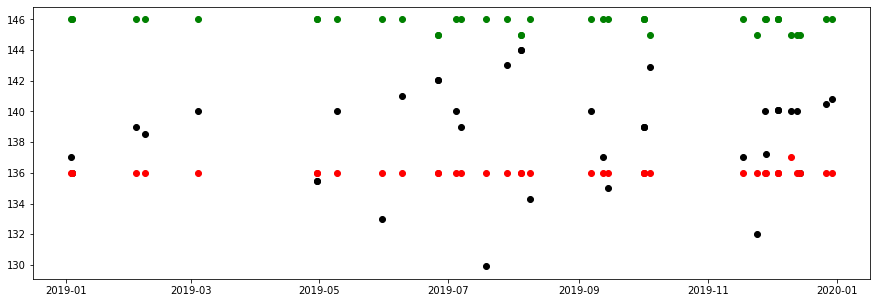

----------------
sodium_mmol/l
Data : (1230, 9)


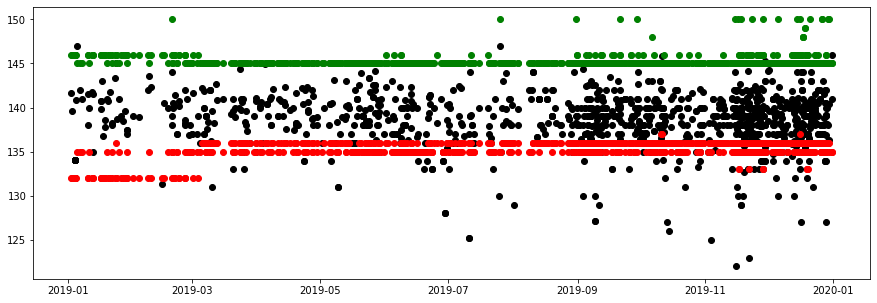

----------------
t4_g/dl
Data : (799, 9)


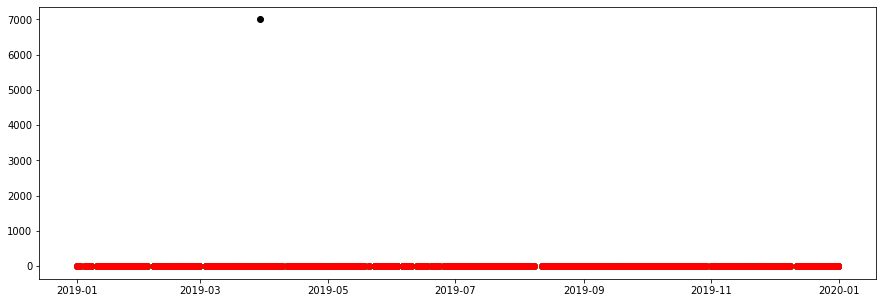

----------------
t4_ng/dl
Data : (156, 9)


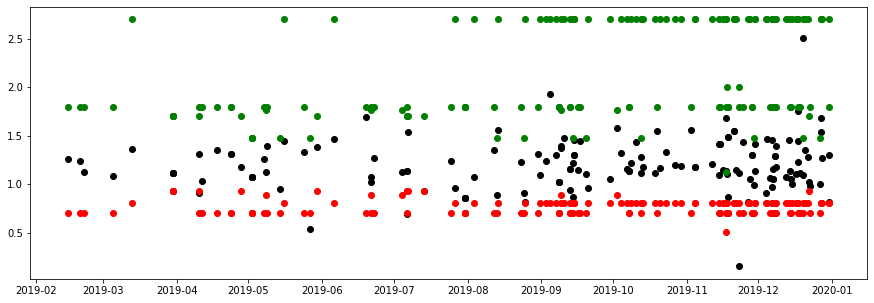

----------------
t4_ug/dl
Data : (1839, 9)


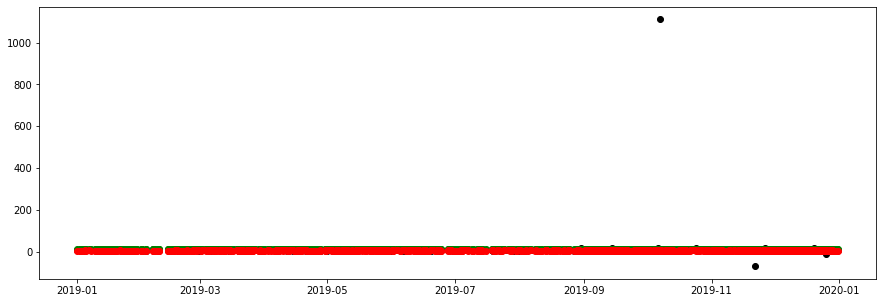

----------------
wbc_/cumm
Data : (10, 9)


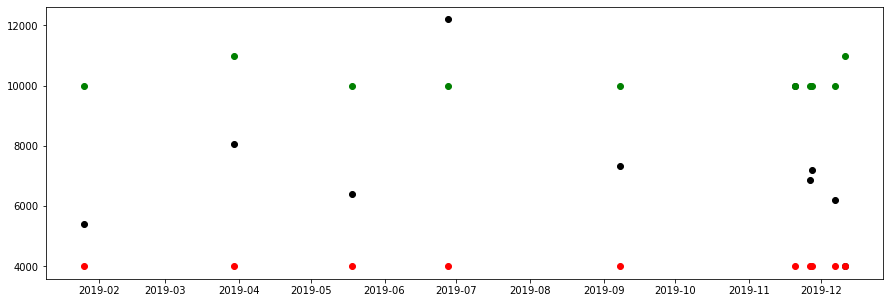

----------------
wbc_103/ul
Data : (2305, 9)


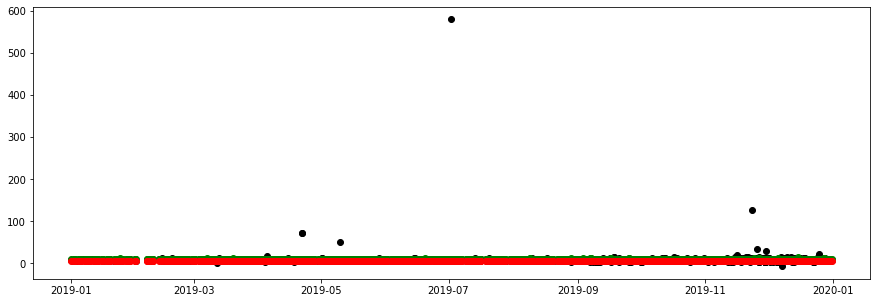

----------------
wbc_cells/cum
Data : (21, 9)


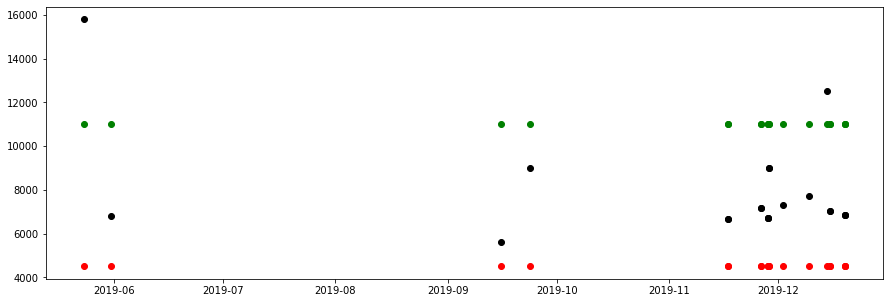

----------------
wbc_cells/cumm
Data : (64, 9)


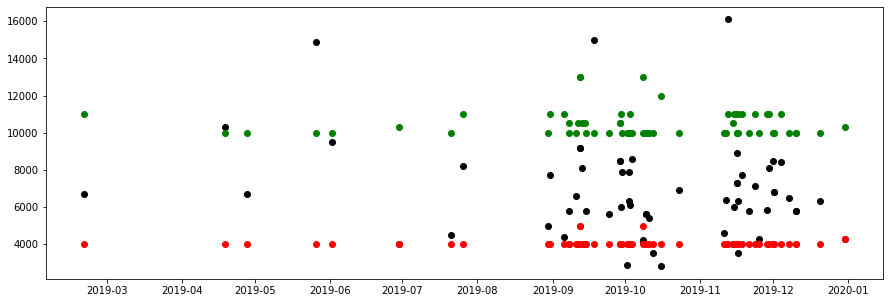

----------------
wbc_cells/ul
Data : (221, 9)


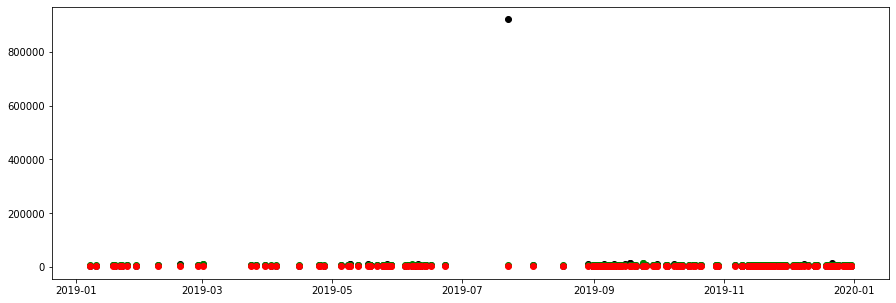

----------------
wbc_thou/mm3
Data : (78, 9)


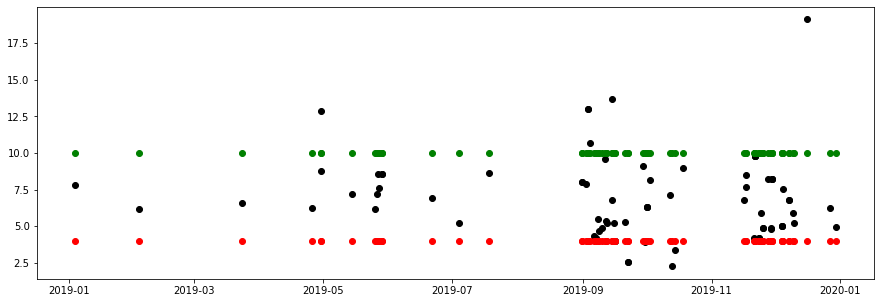

----------------
wbc_thou/ul
Data : (18, 9)


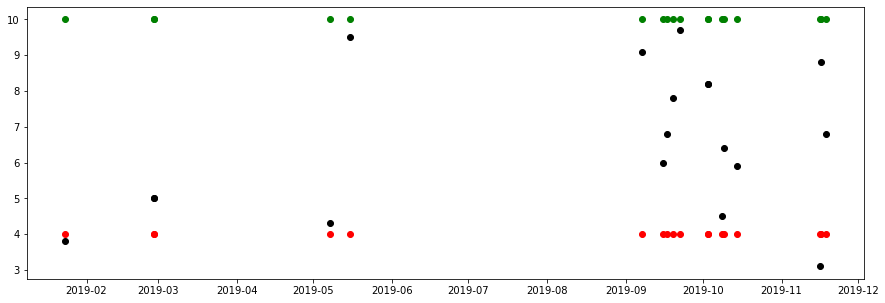

----------------
wbc_x10/l
Data : (843, 9)


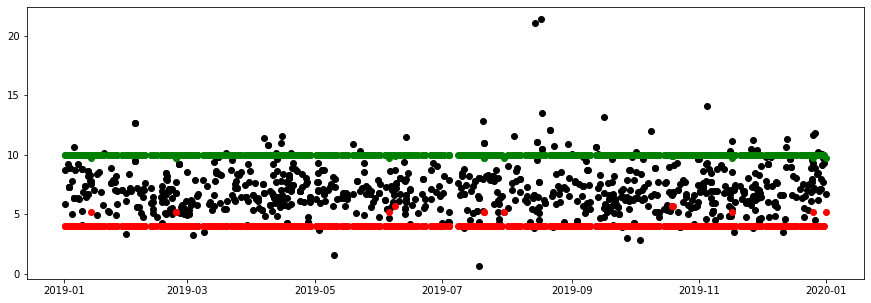

----------------


In [137]:
for eachParamUnit, eachDf in df_filtered.groupby("parameter_unit"):
    print(eachParamUnit)
    print("Data : {}".format(eachDf.shape))
    plt.rcParams['figure.figsize'] = [15, 5]
    fig = plt.figure()

    plt.scatter(eachDf["created_at"], eachDf["parameter_value"], color="black")
    plt.scatter(eachDf["created_at"], eachDf["reference_high"], color="green")
    plt.scatter(eachDf["created_at"], eachDf["reference_low"], color="red")
#     plt.gcf().autofmt_xdate()
    
    plt.show()
    print("----------------")

In [161]:
test = []
for eachParamUnit, eachDf in df_work.groupby("parameter_unit"):
    print(eachParamUnit)
    print(eachDf.shape[0])
    print(set(eachDf["reference_high"].tolist()))
    print(set(eachDf["reference_low"].tolist()))
    print("-----")

chloride_meq/l
34
{107.0, 109.0}
{98.0, 101.0}
-----
chloride_mmol/l
1148
{104.0, 107.0, 108.0, 109.0, 110.0, 111.0, 250.0}
{96.0, 98.0, 99.0, 101.0, 15.0, 94.0}
-----
chloride_pg/ml
2
{4.4}
{2.1}
-----
chloride_uu/ml
12
{4.16}
{0.67}
-----
sgpt_u
1
{41.0}
{0.0}
-----
sgpt_u/l
1171
{32.0, 65.0, 34.0, 5.0, 40.0, 41.0, 42.0, 72.0, 45.0, 49.0, 50.0, 52.0, 55.0, 59.0, 28.0, 63.0}
{0.0, 1.0, 5.0, 6.0, 7.0, 10.0, 13.0, 14.0, 16.0, 21.0, 24.0, 30.0}
-----
sodium_meq/l
39
{145.0, 146.0}
{136.0, 137.0}
-----
sodium_mmol/l
1230
{145.0, 146.0, 148.0, 149.0, 150.0}
{132.0, 133.0, 135.0, 136.0, 137.0}
-----
t4_g/dl
799
{11.72, 12.0}
{4.5, 4.87}
-----
t4_g/l
1
{2.42}
{0.93}
-----
t4_ng/dl
156
{1.7, 1.8, 2.7, 1.48, 1.76, 1.12, 2.0}
{0.7, 0.89, 0.51, 0.8, 0.93}
-----
t4_nmol/l
1
{181.0}
{66.0}
-----
t4_ug/dl
1839
{10.5, 11.72, 11.0, 12.0, 12.23, 13.03, 10.7, 14.1, 11.7, 12.45, 10.9, 13.2, 12.5, 12.6}
{3.2, 4.87, 5.5, 4.5, 4.6, 6.09, 5.74, 5.0, 5.1, 5.6, 5.01, 5.2, 6.0}
-----
wbc_/cmm
4
{10000.0}
{4000

**Pattern Observed**

1. Chloride for different age group and gender

In [181]:
df_cl = df_filtered[(df_filtered["standard_lab_parameter_name"]=="chloride") & (df_filtered["unit"]=="mmol/l")]

df_cl = df_cl[df_cl["parameter_value"] <= 2000]
df_cl["gender_age_group"] = df_cl["gender"] + "_" + df_cl["age_group"]

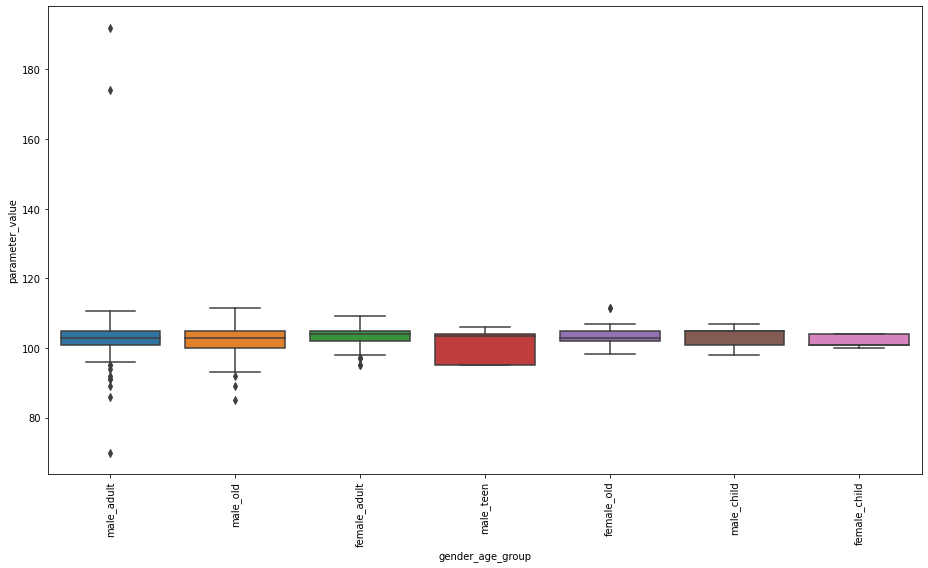

In [183]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(13,8))
ax = sns.boxplot(x="gender_age_group", y="parameter_value",  data=df_cl)
ax = plt.xticks(rotation=90)
ax = plt.tight_layout()
ax = plt.show()

